In [1]:
import pandas as pd
import scipy
import pyreadstat
import pyshs
import matplotlib.pyplot as plt
import seaborn as sns
import prince
import numpy as np

C:\Users\rana_\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_excel(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2014 point d'interrogation\LEEM 201402\201402_BDD.xlsx")

In [4]:
data

,GENDER,QAGE,PCSI8,PCSC8,HHSIZE,UDA9,UDA5,MKTSIZE,INCOME,CHILDL,Q1L,Q2L,Q5L,Q8L,R5L_0,R5L_1,R5L_2,R5L_3,R5L_4,R5L_5,R5L_6,R5L_7,R6L_0,R6L_1,R6L_2,R6L_3,R6L_4,R6L_5,R6L_6,R6L_7,R6L_8,R6L_9,R6L_10,R6L_11,R6L_12,R6L_13,R6L_14,Q86L_0,Q86L_1,Q86L_2,Q86L_3,Q86L_4,Q86L_5,Q86L_6,Q86L_7,Q86L_8,Q86L_9,R9_0,R9_1,R9_2,R9_3,R9_4,R9_5,R9_6,R9_7,R10_0,R10_1,R10_2,R10_3,R10_4,R10_5,R10_6,R10_7,R12A,R12AR,R12B,R12BR,R13A_0,R13A_1,R13A_2,R13A_3,R13A_4,R13A_5,R13A_6,R13A_7,R13AR_0,R13AR_1,R13AR_2,R13AR_3,R13AR_4,R13AR_5,R13AR_6,R13AR_7,R13B_0,R13B_1,R13B_2,R13B_3,R13B_4,R13B_5,R13B_6,R13B_7,R13BR_0,R13BR_1,R13BR_2,R13BR_3,R13BR_4,R13BR_5,R13BR_6,R13BR_7,R14_0,R14_1,R14_2,R14_3,R14_4,R14_5,R14_6,R14_7,R14R_0,R14R_1,R14R_2,R14R_3,R14R_4,R14R_5,R14R_6,R14R_7,R15L_0,R15L_1,R15L_2,R15L_3,R15L_4,R16L_0,R16L_1,R16L_2,R16L_3,R16L_4,R16L_5,R16L_6,R16L_7,R17L_0,R17L_1,R17L_2,R17L_3,R17L_4,R17L_5,R17L_6,R17L_7,R17L_8,R17L_9,R18_0,R18_1,R18_2,R18_3,R18_4,R18_5,R18_6,Q11L_0,Q11L_1,Q11L_2,Q11L_3,Q11L_4,Q11L_5,Q11L_6,Q11L_7,Q11L_8,Q11L_9,R20L_0,R20L_1,R20L_2,R20L_3,R20L_4,R20L_5,R20L_6,R20L_7,R20L_8,R21,R22_0,R22_1,R22_2,R23R_0,R23R_1,R24_0,R24_1,R24_2,R24_3,R24_4,R24_5,Q27L,Q28A,Q28B,Q28C,Q28D,Q28E,Q28F,Q28_0,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28BIS,R28L,R29,Q12,R31L,R32L,R33L_0,R33L_1,R33L_2,R33L_3,R34L,Q43,Q44,PSD
0,2,18,8,4,3,9,5,4,9,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,3,1,3,3,3,3,3,3,2,3,3,2,3,2,2,2,2,3,2,1,2,1,3,1,4,4,1,,,,,,,,,8,4,8,4,8,8,8,8,8,8,6,9,4,4,4,4,4,4,3,4,8,7,8,8,8,8,7,10,4,4,4,4,4,4,4,5,7,5,6,6,7,5,5,,4,3,3,3,4,3,3,,1,1,1,2,4,3,3,3,3,3,3,3,2,5,5,5,2,2,2,2,5,3,3,1,0,0,1,1,0,0,5,3,1,5,3,5,2,5,5,3,0,1,1,1,0,0,0,0,0,1,1,1,3,3,3,0,1,0,1,0,0,2,1,1,3,1,2,4,1,1,3,1,2,4,3,2,3,7,2,2,2,2,1,1,2,2,2,0.925770
1,2,20,8,3,1,6,3,1,1,6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,3,3,2,3,4,4,4,4,2,3,3,4,3,3,3,2,1,3,4,,,,,,,,,3,2,2,1,3,1,2,1,5,3,5,3,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,5,5,5,5,5,5,5,6,3,3,3,3,3,3,3,3,,,,,,,,,,,,,,,,,1,1,2,2,2,3,3,3,3,3,3,3,3,2,3,2,3,2,2,5,3,2,2,1,0,0,1,1,0,0,2,3,2,2,3,5,2,5,5,4,0,0,1,1,0,0,1,0,1,1,1,1,1,3,3,0,1,0,0,0,0,5,3,3,2,1,3,1,3,3,2,1,3,1,1,1,4,4,3,2,2,2,2,2,2,2,2,1.225630
2,2,21,8,8,3,5,2,4,10,6,2,2,3,3,3,3,3,3,2,3,3,3,4,4,3,3,3,2,3,3,4,4,4,3,3,4,4,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,,,,,,,,,6,3,4,3,5,5,6,7,4,1,3,3,3,3,3,4,3,2,2,2,6,6,6,8,4,3,2,6,3,3,3,4,3,2,2,3,7,4,3,2,7,2,1,2,4,3,2,2,4,2,2,2,1,1,1,2,2,3,3,3,3,3,3,3,3,2,4,2,4,4,4,4,4,4,2,0,0,0,1,0,0,0,1,1,3,2,1,1,1,3,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,3,3,0,1,0,1,0,0,2,3,1,3,2,3,2,3,1,3,2,3,2,2,3,4,4,1,1,3,3,3,3,1,2,2,1.054471
3,2,29,4,7,3,1,1,5,12,3,2,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,2,2,4,4,2,3,3,3,2,2,4,3,3,4,3,4,2,3,2,1,2,1,2,2,2,2,2,,,,,,,,,9,4,6,3,8,8,8,8,8,8,8,8,4,4,4,4,4,4,4,4,6,6,6,6,6,6,7,8,3,3,3,3,3,3,4,4,2,3,4,5,6,7,2,2,2,2,3,3,3,4,2,2,1,1,2,2,3,3,3,3,4,3,3,2,3,1,3,1,3,2,1,5,5,3,3,0,0,1,1,1,0,0,1,1,1,2,3,2,3,3,3,2,0,1,1,0,0,0,1,0,1,5,2,2,2,4,4,0,1,0,0,0,0,2,3,1,3,3,3,3,3,1,3,3,3,3,1,1,3,1,1,1,3,3,1,2,1,2,1,0.899481
4,1,30,4,4,3,1,1,5,10,1,2,2,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,4,3,3,3,4,,,,,,,,,2,2,2,2,2,2,2,2,5,3,5,3,3,4,2,5,2,6,5,3,2,3,2,3,2,3,3,2,3,5,2,5,2,6,5,3,2,3,2,3,2,3,3,2,0,2,2,2,3,2,3,3,1,2,2,2,2,2,2,2,2,2,2,2,2,4,4,4,4,4,4,3,4,1,2,2,3,2,2,3,3,2,3,1,1,0,1,0,0,0,2,2,1,2,2,2,2,4,2,2,1,0,0,0,0,0,0,0,0,5,1,1,1,3,2,0,0,0,1,0,0,2,1,1,2,2,1,1,1,1,2,2,1,1,1,3,3,6,2,3,3,3,2,3,2,2,2,0.909262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
list_indeps = ['GENDER', 'Age_cat', 'UDA9', 'UDA9', 'MKTSIZE', 'HHSIZE', 'PCSI8', 'INCOME', 'Q5L', 'Q8L', 'R5L_6', 'R5L_7'
              , 'R6L_0', 'R6L_1', 'R6L_2', 'R6L_3', 'R6L_4', 'R6L_5', 'R6L_6', 'R6L_7', 'R6L_8', 'R6L_9', 'R6L_10', 'R6L_11'
              , 'R6L_12', 'R6L_13', 'R6L_14', 'R13AR_6', 'R13AR_7', 'R13BR_6', 'R13BR_7', 'R14R_0', 'R14R_1', 'R14R_2','R14R_3'
              , 'R14R_4', 'R14R_5', 'R14R_6', 'R14R_7', 'R15L_0', 'R15L_1', 'R15L_2', 'R15L_3', 'R15L_4', 'R16L_0', 'R16L_1'
              , 'R16L_2', 'R16L_3', 'R16L_4', 'R16L_5', 'R16L_6', 'R16L_7', 'R17L_0', 'R17L_1', 'R17L_2', 'R17L_3', 'R17L_4'
              , 'R17L_5', 'R17L_6', 'R17L_7', 'R17L_8', 'R17L_9', 'Q11L_0', 'Q11L_1', 'Q11L_4', 'Q11L_6', 'Q11L_7', 'Q11L_9'
              , 'R23R_1', 'R24_0', 'R24_1', 'R24_2', 'R24_3', 'R24_4', 'R24_5', 'Q27L', 'Q28A', 'Q28B', 'Q28C', 'Q28D', 'Q28E'
              ,  'R28L', 'R29', 'Q12', 'Q86L_4', 'R18_0', 'R18_1', 'R18_2', 'R18_3', 'R18_4', 'R18_5', 'R18_6']

questions_variables = {'GENDER' : "Sexe", 'Age_cat' : "Groupe d'ages", 'UDA9' : "Région", 'MKTSIZE' : "Agglomération"
                      , 'HHSIZE' : "Taille du foyer", 'PCSI8' : " PCS Interviewé", 'INCOME' : "Revenus annuels"
                      , 'Q5L' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?"
                      , 'Q8L' : "Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments que vous prenez ?"
                      , 'R5L_6' : "Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les vaccins"
                      , 'R5L_7' : "Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? L’homéopathie"
                      , 'R6L_0' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre médecin traitant"
                      , 'R6L_1' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux médecins spécialsites"
                      , 'R6L_2' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux pharmaciens"
                      , 'R6L_3' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux infirmières" 
                      , 'R6L_4' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux autorités de santé/Aux pouvoirs publics"
                      , 'R6L_5' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux chercheurs"
                      , 'R6L_6' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux associations"
                      , 'R6L_7' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux notices des médicaments"
                      , 'R6L_8' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux laboratoires pharmaceutiques"
                      , 'R6L_9' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux hommes politiques"
                      , 'R6L_10' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A internet"
                      , 'R6L_11' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la presse écrite"
                      , 'R6L_12' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la television"
                      , 'R6L_13' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la radio"
                      , 'R6L_14' : "En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre entourage"
                      , 'R13AR_6' : "Merci de me donner une note sur 10 pour évaluer aujourd’hui la QUALITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Les vaccins"
                      , 'R13AR_7' : "Merci de me donner une note sur 10 pour évaluer aujourd’hui la QUALITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. L'homéopathie"
                      , 'R13BR_6' : "Merci de me donner une note sur 10 pour évaluer aujourd’hui la SECURITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Les vaccins"
                      , 'R13BR_7' : "Merci de me donner une note sur 10 pour évaluer aujourd’hui la SECURITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. L'homéopathie"
                      , 'R14R_0' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La traçabilité (la possibilité de suivre la chaîne de production et de distribution des médicaments)"
                      , 'R14R_1' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. Les contrôles exercés sur la fabrication de leurs médicaments par les laboratoires pharmaceutiques"
                      , 'R14R_2' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. L’encadrement et le contrôle exercés par les autorités publiques de la phase de recherche des médicaments à la distribution des médicaments en passant par la fabrication"
                      , 'R14R_3' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. Les tests/ études cliniques réalisés pour vérifier avant la commercialisation les possibles effets secondaires"
                      , 'R14R_4' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La qualité de la fabrication/production"
                      , 'R14R_5' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La surveillance des effets secondaires rencontrés par les patients"
                      , 'R14R_6' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La transparence des informations fournies par l’industrie pharmaceutique"
                      , 'R14R_7' : "Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. L’indépendance des personnes qui évaluent les médicaments"
                      , 'R15L_0' : "A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les laboratoires pharmaceutiques"
                      , 'R15L_1' : "A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les pouvoirs publics/autorités de santé"
                      , 'R15L_2' : "A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les médecins"
                      , 'R15L_3' : "A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les pharmaciens"
                      , 'R15L_4' : "A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les patients"
                      , 'R16L_0' : "Diriez-vous que vous êtes : très bien, plutôt bien, plutôt mal, très mal informé ? Sur la qualité des médicaments"
                      , 'R16L_1' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur la sécurité des médicaments"
                      , 'R16L_2' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur les innovations à venir en matière de médicaments dans les 10 prochaines années"
                      , 'R16L_3' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur la fabrication-production des médicaments"
                      , 'R16L_4' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le fonctionnement de la recherche dans le domaine des médicaments"
                      , 'R16L_5' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le rapport entre les bénéfices du médicament  pour les patients et le risque d’effets secondaires (bénéfice-risque)"
                      , 'R16L_6' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur les effets secondaires des médicaments"
                      , 'R16L_7' : "Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le processus d’autorisation de mise sur le marché des médicaments"
                      , 'R17L_0' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Aujourd’hui il existe des médicaments qui n’auraient normalement pas dû obtenir une autorisation de mise sur le marché (AMM) par les autorités de santé"
                      , 'R17L_1' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? La production industrielle des médicaments est strictement encadrée"
                      , 'R17L_2' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les autorités de santé ne contrôlent pas assez les études cliniques qui conditionnent les autorisations de mise sur le marché"
                      , 'R17L_3' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments disponibles sur le marché sont sûrs"
                      , 'R17L_4' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont prescrits par les médecins à bon escient"
                      , 'R17L_5' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont conditionnés de manière optimale pour la sécurité des patients"
                      , 'R17L_6' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont transportés dans des conditions optimales pour leur qualité"
                      , 'R17L_7' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les effets secondaires des médicaments sont suivis de près"
                      , 'R17L_8' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? On n’est pas correctement informés sur les effets secondaires des médicaments"
                      , 'R17L_9' : "Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médias exagèrent parfois les problèmes liés aux médicaments"
                      , 'Q11L_0' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médicaments sont des produits actifs présentant certains risques"
                      , 'Q11L_1' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Vous évitez autant que possible de prendre des médicaments car ils présentent souvent plus de risques que d’avantages"
                      , 'Q11L_4' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médecins prescrivent trop de médicaments"
                      , 'Q11L_6' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. D’une manière générale, les médicaments que vous prenez sont efficaces"
                      , 'Q11L_7' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. La France est un des pays leaders en matière de qualité et de sécurité des médicaments"
                      , 'Q11L_9' : "Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il vous arrive souvent de ressentir des effets secondaires quand vous prenez un médicament"
                      , 'R23R_1' : "Merci de me donner une note sur 10 pour évaluer les différents éléments ci-dessous où 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Le progrès apporté aux patients grâce aux nouveaux médicaments"
                      , 'R24_0' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? L’Etat français"
                      , 'R24_1' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les laboratoires pharmaceutiques"
                      , 'R24_2' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les hôpitaux"
                      , 'R24_3' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les donations privées"
                      , 'R24_4' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les pays étrangers hors Union Européenne"
                      , 'R24_5' : "D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? L’Union Européenne"
                      , 'Q27L' : "Diriez-vous que depuis 20 ans, les médicaments se sont d’une manière générale :"
                      , 'Q28A' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC A (efficaces)"
                      , 'Q28B' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC B ( pratiques)"
                      , 'Q28C' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC C (contrôlés)"
                      , 'Q28D' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC D (avec des effets secondaires)"
                      , 'Q28E' : "Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC E (risqués)"
                      , 'R28L' : "Et voici deux opinions opposées au sujet du médicament. Pouvez-vous me dire de quelle opinion vous vous sentez le plus proche, en positionnant le curseur sur l’échelle ci-dessous : (Il ne faut prendre aucun risque quand on met un médicament sur le marché, car cela peut être dangereux _ A force de prendre trop de précautions, on bloque le progrès en matière de traitements)"
                      , 'R29' : "Quelle phrase reflète le mieux votre attitude par rapport aux médicaments…"
                      , 'Q12' : "A quelle fréquence prenez-vous des médicaments, qu’ils soient avec ou sans ordonnance :"
                      , 'Q86L_4' : "Diriez-vous que vous avez tout à fait, plutôt, plutôt pas ou pas du tout confiance dans les entreprises du secteur : Du médicament"
                      , 'R18_0' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les délocalisations des productions"
                      , 'R18_1' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les arrêts de production"
                      , 'R18_2' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : L’absence d’innovation"
                      , 'R18_3' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : La contrefaçon de médicaments"
                      , 'R18_4' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : La vente de médicaments sur internet"
                      , 'R18_5' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les ruptures de stock dans les pharmacies" 
                      , 'R18_6' : "En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Autre"}

In [6]:
# Variable 'GENDER'
# Question : Sexe
data['GENDER'].value_counts()

GENDER
2    533
1    484
Name: count, dtype: int64

In [7]:
data['GENDER'] = data['GENDER'].astype('category')
data['GENDER'] = data['GENDER'].cat.rename_categories({1 : "Homme"
                                                 , 2 : "Femme"})

In [8]:
data['GENDER'] = pd.Categorical(data['GENDER'], 
                            categories=['Femme', 'Homme'], 
                            ordered=True)

In [9]:
# Variable 'QAGE'
# Question : Respondent Age
data['QAGE'].isna().sum()

0

In [10]:
# définir une fonction pour grouper les valeurs des Ages
def reco_category(x):
    if (x>=18) & (x <= 24) :
        return "18-24 ans"
    if (x>=25) & (x <= 34) :
        return "25-34 ans"
    if (x>=35) & (x <= 44) :
        return "35-44 ans"
    if (x>=45) & (x <= 59) :
        return "45-59 ans"
    if x > 59 :
        return "60 ans et plus"

In [11]:
data['Age_cat'] = data['QAGE'].apply(reco_category)

In [12]:
data['Age_cat'].value_counts()

Age_cat
60 ans et plus    290
45-59 ans         272
35-44 ans         184
25-34 ans         163
18-24 ans         108
Name: count, dtype: int64

In [13]:
#changer l'order des categories de la variable 'Age_cat'
data['Age_cat'] = pd.Categorical(data['Age_cat'], 
                            categories=['18-24 ans'
                                        , '25-34 ans'
                                        , '35-44 ans'
                                       , '45-54 ans'
                                       , '55-59 ans'
                                       , '60 ans et plus'], 
                            ordered=True)

In [14]:
# Variable 'UDA9'
# Question : Région
data['UDA9'].value_counts()

UDA9
1    174
5    143
9    127
8    126
7    116
2     96
6     86
3     80
4     69
Name: count, dtype: int64

In [15]:
data['UDA9'] = data['UDA9'].astype('category')
data['UDA9'] = data['UDA9'].cat.rename_categories({1 : "IDF"
                                                 , 2 : "Bassin Parisien OUEST"
                                                 , 3 : "Bassin Parisien EST"
                                                 , 4 : "Nord"
                                                 , 5 : "Ouest"
                                                 , 6 : "Est"
                                                 , 7 : "Sud Ouest"
                                                 , 8 : "Sud Est"
                                                 , 9 : "Méditerranée"})


In [16]:
data['UDA9'].value_counts()

UDA9
IDF                      174
Ouest                    143
Méditerranée             127
Sud Est                  126
Sud Ouest                116
Bassin Parisien OUEST     96
Est                       86
Bassin Parisien EST       80
Nord                      69
Name: count, dtype: int64

In [17]:
# Variable 'MKTSIZE'
# Question : Agglomération
data['MKTSIZE'].value_counts()

MKTSIZE
4    311
1    241
2    177
5    154
3    134
Name: count, dtype: int64

In [18]:
data['MKTSIZE'] = data['MKTSIZE'].astype('category')
data['MKTSIZE'] = data['MKTSIZE'].cat.rename_categories({1 : "Rural"
                                                 , 2 : "2.000 à 19.999 hab."
                                                 , 3 : "20.000 à 99.999 hab."
                                                 , 4 : "100.000 hab. et plus"
                                                 , 5 : "Agglomération de Paris"})

In [19]:
#changer l'order des categories de la variable 'MKTSIZE'
data['MKTSIZE'] = pd.Categorical(data['MKTSIZE'], 
                            categories=['Rural'
                                        , '2.000 à 19.999 hab.'
                                        , '20.000 à 99.999 hab.'
                                       , '100.000 hab. et plus'
                                       , 'Agglomération de Paris'], 
                            ordered=True)

In [20]:
data['MKTSIZE'].value_counts()

MKTSIZE
100.000 hab. et plus      311
Rural                     241
2.000 à 19.999 hab.       177
Agglomération de Paris    154
20.000 à 99.999 hab.      134
Name: count, dtype: int64

In [21]:
# Variable 'HHSIZE'
# Question : Taille du foyer
data['HHSIZE'].value_counts()

HHSIZE
3    458
2    367
1    192
Name: count, dtype: int64

In [22]:
data['HHSIZE'] = data['HHSIZE'].astype('category')
data['HHSIZE'] = data['HHSIZE'].cat.rename_categories({1 : "1 personne"
                                                 , 2 : "2 personnes"
                                                 , 3 : "3 personnes ou plus"})

In [23]:
#changer l'order des categories de la variable 'HHSIZE'
data['HHSIZE'] = pd.Categorical(data['HHSIZE'], 
                            categories=['1 personne'
                                        , '2 personnes'
                                        , '3 personnes ou plus'], 
                            ordered=True)

In [24]:
# Variable 'MARITALL' n'existe pas 
# Variable 'EMP' cette variable n'existe pas
# Il n'y a pas de variable education ou diplome
# Variable 'PCSI8'
# Question : PCS Interviewé
data['PCSI8'].value_counts()

PCSI8
7    301
5    201
4    153
8    135
3     99
6     96
2     29
1      3
Name: count, dtype: int64

In [25]:
data['PCSI8'] = data['PCSI8'].astype('category')
data['PCSI8'] = data['PCSI8'].cat.rename_categories({1 : "Agriculteur exploitant"
                                                 , 2 : "Artisan / Commerçant / Chef d'entreprise"
                                                 , 3 : "Profession libérale / Cadre supérieur"
                                                 , 4 : "Profession intermédiaire"
                                                 , 5 : "Employé"
                                                 , 6 : "Ouvrier"
                                                 , 7 : "Retraité"
                                                 , 8 : "Inactif"})

In [26]:
data['PCSI8'].value_counts()

PCSI8
Retraité                                    301
Employé                                     201
Profession intermédiaire                    153
Inactif                                     135
Profession libérale / Cadre supérieur        99
Ouvrier                                      96
Artisan / Commerçant / Chef d'entreprise     29
Agriculteur exploitant                        3
Name: count, dtype: int64

In [27]:
# Variable 'INCOME'
# Question : Revenus annuels
data['INCOME'].value_counts()

INCOME
8     166
10    153
9     127
7      96
11     94
6      90
5      71
1      53
4      50
3      49
12     38
2      27
13      3
Name: count, dtype: int64

In [28]:
data['INCOME'] = data['INCOME'].astype('category')
data['INCOME'] = data['INCOME'].cat.rename_categories({1 : "Entre 0 € et 6000 €"
                                                 , 2 : "De 6001 € à 9000 €"
                                                 , 3 : "De 9001 € à 12000 €"
                                                 , 4 : "De 12001 € à 15000 €"
                                                 , 5 : "De 15001 € à 18000 €"
                                                 , 6 : "De 18001 € à 21000 €"
                                                 , 7 : "De 21001 € à 24000 €"
                                                 , 8 : "De 24001 € à 30000 €"
                                                 , 9 : "De 30001 € à 36000 €"
                                                 , 10 : "De 36001 € à 48000 €"
                                                 , 11 : "De 48001 € à 60000 €"
                                                 , 12 : "De 60001 € à 120000 €"
                                                 , 13 : "120001 € et plus"})

In [29]:
data['INCOME'].value_counts()

INCOME
De 24001 € à 30000 €     166
De 36001 € à 48000 €     153
De 30001 € à 36000 €     127
De 21001 € à 24000 €      96
De 48001 € à 60000 €      94
De 18001 € à 21000 €      90
De 15001 € à 18000 €      71
Entre 0 € et 6000 €       53
De 12001 € à 15000 €      50
De 9001 € à 12000 €       49
De 60001 € à 120000 €     38
De 6001 € à 9000 €        27
120001 € et plus           3
Name: count, dtype: int64

In [30]:
#changer l'order des categories de la variable 'INCOME'
data['INCOME'] = pd.Categorical(data['INCOME'], 
                            categories=['Entre 0 € et 6000 €'
                                        , 'De 6001 € à 9000 €'
                                        , 'De 9001 € à 12000 €'
                                        , 'De 12001 € à 15000 €'
                                        , 'De 15001 € à 18000 €'
                                        , 'De 18001 € à 21000 €'
                                        , 'De 21001 € à 24000 €'
                                        , 'De 24001 € à 30000 €'
                                        , 'De 30001 € à 36000 €'
                                        , 'De 36001 € à 48000 €'
                                        , 'De 48001 € à 60000 €'
                                        , 'De 60001 € à 120000 €'
                                        , '120001 € et plus'], 
                            ordered=True)

In [31]:
# Variable'Q5L'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments ?
data['Q5L'].value_counts()

Q5L
2    704
3    210
1     62
4     41
Name: count, dtype: int64

In [32]:
# Variable'Q8L'
# Question : Faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance aux médicaments que vous prenez ?
data['Q8L'].value_counts()

Q8L
2    710
1    156
3    136
4     15
Name: count, dtype: int64

In [33]:
data[['Q5L', 'Q8L']] = data[['Q5L', 'Q8L']].astype('category')

In [34]:
Items5L_8L = ['Q5L', 'Q8L']

In [35]:
for i in data[Items5L_8L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [36]:
#changer l'order des categories
for i in data[Items5L_8L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [37]:
# Variable 'R5L_6'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? Les vaccins
data['R5L_6'].value_counts()

R5L_6
2    556
3    233
1    167
4     61
Name: count, dtype: int64

In [38]:
# Variable 'R5L_7'
# Question : Pour chacun des types de médicaments suivants, lui faites-vous tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance ? L’homéopathie
data['R5L_7'].value_counts()

R5L_7
2    480
3    261
1    214
4     62
Name: count, dtype: int64

In [39]:
data[['R5L_6', 'R5L_7']] = data[['R5L_6', 'R5L_7']].astype('category')

In [40]:
ItemsR5L = ['R5L_6', 'R5L_7']

In [41]:
for i in data[ItemsR5L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [42]:
#changer l'order des categories
for i in data[ItemsR5L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [43]:
data['R5L_6'].value_counts()

R5L_6
Plutôt confiance         556
Plutôt pas confiance     233
Tout à fait confiance    167
Pas du tout confiance     61
Name: count, dtype: int64

In [44]:
# Variable 'R6L_0'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre médecin traitant
data['R6L_0'].value_counts()

R6L_0
2    563
1    392
3     51
4     11
Name: count, dtype: int64

In [45]:
# Variable 'R6L_1'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux médecins spécialsites
data['R6L_1'].value_counts()

R6L_1
2    630
1    313
3     62
4     12
Name: count, dtype: int64

In [46]:
# Variable 'R6L_2'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux pharmaciens
data['R6L_2'].value_counts()

R6L_2
2    670
1    216
3    105
4     26
Name: count, dtype: int64

In [47]:
# Variable 'R6L_3'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux infirmières
data['R6L_3'].value_counts()

R6L_3
2    710
1    192
3    101
4     14
Name: count, dtype: int64

In [48]:
# Variable 'R6L_4'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux autorités de santé/Aux pouvoirs publics
data['R6L_4'].value_counts()

R6L_4
2    454
3    375
4    118
1     70
Name: count, dtype: int64

In [49]:
# Variable 'R6L_5'
# Question : En matière d’information sur les médicaments,  diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux chercheurs
data['R6L_5'].value_counts()

R6L_5
2    662
1    221
3    116
4     18
Name: count, dtype: int64

In [50]:
# Variable 'R6L_6'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux associations
data['R6L_6'].value_counts()

R6L_6
2    511
3    365
4     86
1     55
Name: count, dtype: int64

In [51]:
# Variable 'R6L_7'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux notices des médicaments
data['R6L_7'].value_counts()

R6L_7
2    699
1    153
3    147
4     18
Name: count, dtype: int64

In [52]:
# Variable 'R6L_8'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux laboratoires pharmaceutiques
data['R6L_8'].value_counts()

R6L_8
2    385
3    384
4    199
1     49
Name: count, dtype: int64

In [53]:
# Variable 'R6L_9'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : Aux hommes politiques
data['R6L_9'].value_counts()

R6L_9
4    521
3    421
2     65
1     10
Name: count, dtype: int64

In [54]:
# Variable 'R6L_10'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A internet
data['R6L_10'].value_counts()

R6L_10
3    527
4    241
2    227
1     22
Name: count, dtype: int64

In [55]:
# Variable 'R6L_11'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la presse écrite
data['R6L_11'].value_counts()

R6L_11
3    525
2    327
4    146
1     19
Name: count, dtype: int64

In [56]:
# Variable 'R6L_12'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la television
data['R6L_12'].value_counts()

R6L_12
3    539
2    257
4    205
1     16
Name: count, dtype: int64

In [57]:
# Variable 'R6L_13'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A la radio
data['R6L_13'].value_counts()

R6L_13
3    537
2    290
4    167
1     23
Name: count, dtype: int64

In [58]:
# Variable 'R6L_14'
# Question : En matière d’information sur les médicaments, diriez-vous que vous faites personnellement tout à fait confiance, plutôt confiance, plutôt pas confiance ou pas du tout confiance : A votre entourage
data['R6L_14'].value_counts()

R6L_14
2    510
3    346
1     93
4     68
Name: count, dtype: int64

In [59]:
data[['R6L_0', 'R6L_1', 'R6L_2', 'R6L_3', 'R6L_4', 'R6L_5', 'R6L_6', 'R6L_7', 'R6L_8', 'R6L_9', 'R6L_10', 'R6L_11', 'R6L_12', 'R6L_13', 'R6L_14']] = data[['R6L_0', 'R6L_1', 'R6L_2', 'R6L_3', 'R6L_4', 'R6L_5', 'R6L_6', 'R6L_7', 'R6L_8', 'R6L_9', 'R6L_10', 'R6L_11', 'R6L_12', 'R6L_13', 'R6L_14']].astype('category')

In [60]:
ItemsR6L = ['R6L_0', 'R6L_1', 'R6L_2', 'R6L_3', 'R6L_4', 'R6L_5', 'R6L_6', 'R6L_7', 'R6L_8', 'R6L_9', 'R6L_10', 'R6L_11', 'R6L_12', 'R6L_13', 'R6L_14']

In [61]:
for i in data[ItemsR6L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait confiance"
                                                 , 2 : "Plutôt confiance"
                                                 , 3 : "Plutôt pas confiance"
                                                 , 4 : "Pas du tout confiance"})

In [62]:
#changer l'order des categories
for i in data[ItemsR6L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout confiance'
                                        , 'Plutôt pas confiance'
                                        , 'Plutôt confiance'
                                       , 'Tout à fait confiance'], 
                            ordered=True)

In [63]:
data['R6L_10'].value_counts()

R6L_10
Plutôt pas confiance     527
Pas du tout confiance    241
Plutôt confiance         227
Tout à fait confiance     22
Name: count, dtype: int64

In [64]:
# Variable 'R13AR_6'
# Question : Merci de me donner une note sur 10 pour évaluer aujourd’hui la QUALITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Les vaccins
data['R13AR_6'].value_counts()

R13AR_6
4    542
3    355
2     52
5     37
1     31
Name: count, dtype: int64

In [65]:
# Variable 'R13AR_7'
# Question : Merci de me donner une note sur 10 pour évaluer aujourd’hui la QUALITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. L'homéopathie
data['R13AR_7'].value_counts()

R13AR_7
4    507
3    344
2     70
5     60
1     36
Name: count, dtype: int64

In [66]:
# Variable 'R13BR_6'
# Question : Merci de me donner une note sur 10 pour évaluer aujourd’hui la SECURITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Les vaccins
data['R13BR_6'].value_counts()

R13BR_6
4    466
3    395
2     85
1     37
5     34
Name: count, dtype: int64

In [67]:
# Variable 'R13BR_7'
# Question : Merci de me donner une note sur 10 pour évaluer aujourd’hui la SECURITE des produits de santé suivants. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. L'homéopathie
data['R13BR_7'].value_counts()

R13BR_7
4    528
3    292
5    121
2     46
1     30
Name: count, dtype: int64

In [68]:
data[['R13AR_6', 'R13AR_7', 'R13BR_6', 'R13BR_7']] = data[['R13AR_6', 'R13AR_7', 'R13BR_6', 'R13BR_7']].astype('category')

In [69]:
Items13AB = ['R13AR_6', 'R13AR_7', 'R13BR_6', 'R13BR_7']

In [70]:
for i in data[Items13AB].columns:
    data[i] = data[i].cat.rename_categories({1: "0"
                                                 , 2 : "1-3"
                                                 , 3 : "4-6"
                                                 , 4 : "7-9"
                                                 , 5 : "10"})

In [71]:
#changer l'order des categories
for i in data[Items13AB].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['0'
                                        , '1-3'
                                        , '4-6'
                                       , '7-9'
                                       , '10'], 
                            ordered=True)

In [72]:
data['R13AR_7'].value_counts()

R13AR_7
7-9    507
4-6    344
1-3     70
10      60
0       36
Name: count, dtype: int64

In [73]:
# Variable 'R14R_0'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concet les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout.  Les notes intermédiaires permettent de nuancer votre jugement. La traçabilité (la possibilité de suivre la chaîne de production et de distribution des médicaments)
data['R14R_0'].value_counts()

R14R_0
4    314
3    294
     246
2    108
1     29
5     26
Name: count, dtype: int64

In [74]:
# Variable 'R14R_1'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout.  Les notes intermédiaires permettent de nuancer votre jugement. Les contrôles exercés sur la fabrication de leurs médicaments par les laboratoires pharmaceutiques
data['R14R_1'].value_counts()

R14R_1
3    342
4    311
     211
2    108
1     27
5     18
Name: count, dtype: int64

In [75]:
# Variable 'R14R_2'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. L’encadrement et le contrôle exercés par les autorités publiques de la phase de recherche des médicaments à la distribution des médicaments en passant par la fabrication
data['R14R_2'].value_counts()

R14R_2
3    382
4    270
     209
2    108
1     30
5     18
Name: count, dtype: int64

In [76]:
# Variable 'R14R_3'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. Les tests/ études cliniques réalisés pour vérifier avant la commercialisation les possibles effets secondaires
data['R14R_3'].value_counts()

R14R_3
4    352
3    346
     205
2     86
1     14
5     14
Name: count, dtype: int64

In [77]:
# Variable 'R14R_4'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La qualité de la fabrication/production
data['R14R_4'].value_counts()

R14R_4
4    444
3    262
     253
2     28
5     20
1     10
Name: count, dtype: int64

In [78]:
# Variable 'R14R_5'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La surveillance des effets secondaires rencontrés par les patients
data['R14R_5'].value_counts()

R14R_5
3    379
4    297
     196
2    110
1     25
5     10
Name: count, dtype: int64

In [79]:
# Variable 'R14R_6'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. La transparence des informations fournies par l’industrie pharmaceutique
data['R14R_6'].value_counts()

R14R_6
3    394
2    226
     183
4    139
1     68
5      7
Name: count, dtype: int64

In [80]:
# Variable 'R14R_7'
# Question : Merci de donner une note sur 10 pour évaluer chacun des éléments suivants concernant les médicaments aujourd’hui où 10 correspond à une note excellente c’est-à-dire que c’est très bien fait, 0 une note nulle c’est-à-dire que cela est très mal fait ou n’est pas fait du tout. Les notes intermédiaires permettent de nuancer votre jugement. L’indépendance des personnes qui évaluent les médicaments
data['R14R_7'].value_counts()

R14R_7
3    338
     259
2    217
4    137
1     59
5      7
Name: count, dtype: int64

In [81]:
data[['R14R_0', 'R14R_1', 'R14R_2','R14R_3', 'R14R_4', 'R14R_5', 'R14R_6', 'R14R_7']] = data[['R14R_0', 'R14R_1', 'R14R_2','R14R_3', 'R14R_4', 'R14R_5', 'R14R_6', 'R14R_7']].astype('category')

In [82]:
ItemsR14R = ['R14R_0', 'R14R_1', 'R14R_2','R14R_3', 'R14R_4', 'R14R_5', 'R14R_6', 'R14R_7']

In [83]:
for i in data[ItemsR14R].columns:
    data[i] = data[i].cat.rename_categories({1: "0"
                                                 , 2 : "1-3"
                                                 , 3 : "4-6"
                                                 , 4 : "7-9"
                                                 , 5 : "10"
                                                 , ' ' : "Je ne sais pas"})

In [84]:
#changer l'order des categories
for i in data[ItemsR14R].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['0'
                                        , '1-3'
                                        , '4-6'
                                       , '7-9'
                                       , '10'
                                       , 'Je ne sais pas'], 
                            ordered=True)

In [85]:
# Variable 'R15L_0'
# Question : A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les laboratoires pharmaceutiques
data['R15L_0'].value_counts()

R15L_0
1    671
2    238
3     88
4     20
Name: count, dtype: int64

In [86]:
# Variable 'R15L_1'
# Question : A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les pouvoirs publics/autorités de santé
data['R15L_1'].value_counts()

R15L_1
1    501
2    341
3    143
4     32
Name: count, dtype: int64

In [87]:
# Variable 'R15L_2'
# Question : A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les médecins
data['R15L_2'].value_counts()

R15L_2
2    544
1    298
3    155
4     20
Name: count, dtype: int64

In [88]:
# Variable 'R15L_3'
# Question : A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les pharmaciens
data['R15L_3'].value_counts()

R15L_3
2    551
3    232
1    210
4     24
Name: count, dtype: int64

In [89]:
# Variable 'R15L_4'
# Question : A propos de la sécurité des médicaments, diriez-vous que la responsabilité des acteurs suivants est… Les patients
data['R15L_4'].value_counts()

R15L_4
3    478
2    324
4    135
1     80
Name: count, dtype: int64

In [90]:
data[['R15L_0', 'R15L_1', 'R15L_2', 'R15L_3', 'R15L_4']] = data[['R15L_0', 'R15L_1', 'R15L_2', 'R15L_3', 'R15L_4']].astype('category')

In [91]:
ItemsR15L = ['R15L_0', 'R15L_1', 'R15L_2', 'R15L_3', 'R15L_4']

In [92]:
for i in data[ItemsR15L].columns:
    data[i] = data[i].cat.rename_categories({1: "Très élevée"
                                                 , 2 : "Plutôt élevée"
                                                 , 3 : "Plutôt faible"
                                                 , 4 : "Nulle"})

In [93]:
#changer l'order des categories
for i in data[ItemsR15L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Nulle'
                                        , 'Plutôt faible'
                                        , 'Plutôt élevée'
                                       , 'Très élevée'], 
                            ordered=True)

In [94]:
# Variable 'R16L_0'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur la qualité des médicaments
data['R16L_0'].value_counts()

R16L_0
3    570
2    291
4    131
1     25
Name: count, dtype: int64

In [95]:
# Variable 'R16L_1'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur la sécurité des médicaments
data['R16L_1'].value_counts()

R16L_1
3    615
2    223
4    156
1     23
Name: count, dtype: int64

In [96]:
# Variable 'R16L_2'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur les innovations à venir en matière de médicaments dans les 10 prochaines années
data['R16L_2'].value_counts()

R16L_2
3    582
4    260
2    152
1     23
Name: count, dtype: int64

In [97]:
# Variable 'R16L_3'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur la fabrication-production des médicaments
data['R16L_3'].value_counts()

R16L_3
3    601
4    291
2    104
1     21
Name: count, dtype: int64

In [98]:
# Variable 'R16L_4'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le fonctionnement de la recherche dans le domaine des médicaments
data['R16L_4'].value_counts()

R16L_4
3    613
4    226
2    152
1     26
Name: count, dtype: int64

In [99]:
# Variable 'R16L_5'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le rapport entre les bénéfices du médicament  pour les patients et le risque d’effets secondaires (bénéfice-risque)
data['R16L_5'].value_counts()

R16L_5
3    542
2    252
4    189
1     34
Name: count, dtype: int64

In [100]:
# Variable 'R16L_6'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur les effets secondaires des médicaments
data['R16L_6'].value_counts()

R16L_6
3    426
2    413
4    134
1     44
Name: count, dtype: int64

In [101]:
# Variable 'R16L_7'
# Question : Diriez-vous que vous êtes: très bien, plutôt bien, plutôt mal, très mal informé ? Sur le processus d’autorisation de mise sur le marché des médicaments
data['R16L_7'].value_counts()

R16L_7
3    551
4    288
2    158
1     20
Name: count, dtype: int64

In [102]:
data[['R16L_0', 'R16L_1', 'R16L_2', 'R16L_3', 'R16L_4', 'R16L_5', 'R16L_6', 'R16L_7']] = data[['R16L_0', 'R16L_1', 'R16L_2', 'R16L_3', 'R16L_4', 'R16L_5', 'R16L_6', 'R16L_7']].astype('category')

In [103]:
ItemsR16 = ['R16L_0', 'R16L_1', 'R16L_2', 'R16L_3', 'R16L_4', 'R16L_5', 'R16L_6', 'R16L_7']

In [104]:
for i in data[ItemsR16].columns:
    data[i] = data[i].cat.rename_categories({1: "Très bien informé"
                                                 , 2 : "Plutôt bien informé"
                                                 , 3 : "Plutôt mal informé"
                                                 , 4 : "Très mal informé"})

In [105]:
#changer l'order des categories
for i in data[ItemsR16].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Très mal informé'
                                        , 'Plutôt mal informé'
                                        , 'Plutôt bien informé'
                                       , 'Très bien informé'], 
                            ordered=True)

In [106]:
# Variable 'R17L_0'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Aujourd’hui il existe des médicaments qui n’auraient normalement pas dû obtenir une autorisation de mise sur le marché (AMM) par les autorités de santé
data['R17L_0'].value_counts()

R17L_0
1    383
2    366
5    145
3    105
4     18
Name: count, dtype: int64

In [107]:
# Variable 'R17L_1'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? La production industrielle des médicaments est strictement encadrée
data['R17L_1'].value_counts()

R17L_1
2    389
3    327
5    148
4     88
1     65
Name: count, dtype: int64

In [108]:
# Variable 'R17L_2'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les autorités de santé ne contrôlent pas assez les études cliniques qui conditionnent les autorisations de mise sur le marché
data['R17L_2'].value_counts()

R17L_2
2    406
1    277
3    170
5    126
4     38
Name: count, dtype: int64

In [109]:
# Variable 'R17L_3'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments disponibles sur le marché sont sûrs
data['R17L_3'].value_counts()

R17L_3
2    522
3    277
4     94
5     90
1     34
Name: count, dtype: int64

In [110]:
# Variable 'R17L_4'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont prescrits par les médecins à bon escient
data['R17L_4'].value_counts()

R17L_4
2    607
3    197
1    105
5     60
4     48
Name: count, dtype: int64

In [111]:
# Variable 'R17L_5'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont conditionnés de manière optimale pour la sécurité des patients
data['R17L_5'].value_counts()

R17L_5
2    467
3    245
4    139
1     87
5     79
Name: count, dtype: int64

In [112]:
# Variable 'R17L_6'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médicaments sont transportés dans des conditions optimales pour leur qualité
data['R17L_6'].value_counts()

R17L_6
2    527
5    242
3    127
1     94
4     27
Name: count, dtype: int64

In [113]:
# Variable 'R17L_7'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les effets secondaires des médicaments sont suivis de près
data['R17L_7'].value_counts()

R17L_7
3    421
2    309
4    128
5    121
1     38
Name: count, dtype: int64

In [114]:
# Variable 'R17L_8'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? On n’est pas correctement informés sur les effets secondaires des médicaments
data['R17L_8'].value_counts()

R17L_8
3    339
2    338
1    204
4     96
5     40
Name: count, dtype: int64

In [115]:
# Variable 'R17L_9'
# Question : Voici différentes affirmations, vous me direz pour chacune si vous êtes tout à fait d’accord, plutôt d’accord, plutôt pas d’accord, pas du tout d’accord ? Les médias exagèrent parfois les problèmes liés aux médicaments
data['R17L_9'].value_counts()

R17L_9
2    353
3    281
1    156
4    151
5     76
Name: count, dtype: int64

In [116]:
data[['R17L_0', 'R17L_1', 'R17L_2', 'R17L_3', 'R17L_4', 'R17L_5', 'R17L_6', 'R17L_7', 'R17L_8', 'R17L_9']] = data[['R17L_0', 'R17L_1', 'R17L_2', 'R17L_3', 'R17L_4', 'R17L_5', 'R17L_6', 'R17L_7', 'R17L_8', 'R17L_9']].astype('category')

In [117]:
ItemsR17 = ['R17L_0', 'R17L_1', 'R17L_2', 'R17L_3', 'R17L_4', 'R17L_5', 'R17L_6', 'R17L_7', 'R17L_8', 'R17L_9']

In [118]:
for i in data[ItemsR17].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Ne sait pas"})

In [119]:
#changer l'order des categories
for i in data[ItemsR17].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , 'Ne sait pas'], 
                            ordered=True)

In [120]:
# Variable 'Q11L_0'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médicaments sont des produits actifs présentant certains risques
data['Q11L_0'].value_counts()

Q11L_0
1    473
2    428
3     62
5     43
4     11
Name: count, dtype: int64

In [121]:
# Variable 'Q11L_1'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Vous évitez autant que possible de prendre des médicaments car ils présentent souvent plus de risques que d’avantages
data['Q11L_1'].value_counts()

Q11L_1
2    408
1    252
3    232
4     86
5     39
Name: count, dtype: int64

In [122]:
# Variable 'Q11L_4'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Les médecins prescrivent trop de médicaments
data['Q11L_4'].value_counts()

Q11L_4
2    413
3    274
1    217
5     65
4     48
Name: count, dtype: int64

In [123]:
# Variable 'Q11L_6'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. D’une manière générale, les médicaments que vous prenez sont efficaces
data['Q11L_6'].value_counts()

Q11L_6
2    733
1    159
3     67
5     44
4     14
Name: count, dtype: int64

In [124]:
# Variable 'Q11L_7'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. La France est un des pays leaders en matière de qualité et de sécurité des médicaments
data['Q11L_7'].value_counts()

Q11L_7
2    440
5    291
3    165
1     69
4     52
Name: count, dtype: int64

In [125]:
# Variable 'Q11L_9'
# Question : Voici maintenant quelques phrases. Pour chacune d’elles, pouvez-vous indiquer si elle correspond tout à fait, plutôt, plutôt pas ou pas du tout à ce que vous pensez. Il vous arrive souvent de ressentir des effets secondaires quand vous prenez un médicament
data['Q11L_9'].value_counts()

Q11L_9
3    456
2    255
4    190
1     66
5     50
Name: count, dtype: int64

In [126]:
data[['Q11L_0', 'Q11L_1', 'Q11L_4', 'Q11L_6', 'Q11L_7', 'Q11L_9']] = data[['Q11L_0', 'Q11L_1', 'Q11L_4', 'Q11L_6', 'Q11L_7', 'Q11L_9']].astype('category')

In [127]:
ItemsQ11L = ['Q11L_0', 'Q11L_1', 'Q11L_4', 'Q11L_6', 'Q11L_7', 'Q11L_9']

In [128]:
for i in data[ItemsQ11L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Vous ne savez pas"})

In [129]:
#changer l'order des categories
for i in data[ItemsQ11L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

In [130]:
# Variable 'R23R_1'
# Question : Merci de me donner une note sur 10 pour évaluer les différents éléments ci-dessous où 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. Le progrès apporté aux patients grâce aux nouveaux médicaments
data['R23R_1'].value_counts()

R23R_1
4    582
3    356
2     36
5     31
1     12
Name: count, dtype: int64

In [131]:
data['R23R_1'] = data['R23R_1'].astype('category')

In [132]:
data['R23R_1'] = data['R23R_1'].cat.rename_categories({1: "0"
                                                      , 2 : "1-3"
                                                      , 3 : "4-6"
                                                      , 4 : "7-9"
                                                      , 5 : "10"})

In [133]:
#changer l'order des categories
data['R23R_1'] = pd.Categorical(data['R23R_1'], 
                            categories=['0'
                                        , '1-3'
                                        , '4-6'
                                       , '7-9'
                                       , '10'], 
                            ordered=True)

In [134]:
# Variable 'R24_0'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? L’Etat français
data['R24_0'].value_counts()

R24_0
0    684
1    333
Name: count, dtype: int64

In [135]:
# Variable 'R24_1'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les laboratoires pharmaceutiques
data['R24_1'].value_counts()

R24_1
1    774
0    243
Name: count, dtype: int64

In [136]:
# Variable 'R24_2'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les hôpitaux
data['R24_2'].value_counts()

R24_2
0    983
1     34
Name: count, dtype: int64

In [137]:
# Variable 'R24_3'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les donations privées
data['R24_3'].value_counts()

R24_3
0    625
1    392
Name: count, dtype: int64

In [138]:
# Variable 'R24_4'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? Les pays étrangers hors Union Européenne
data['R24_4'].value_counts()

R24_4
0    997
1     20
Name: count, dtype: int64

In [139]:
# Variable 'R24_5'
# Question : D’après vous qui finance principalement la recherche de nouveaux médicaments aujourd’hui disponibles en France ? L’Union Européenne
data['R24_5'].value_counts()

R24_5
0    886
1    131
Name: count, dtype: int64

In [140]:
data[['R24_0', 'R24_1', 'R24_2', 'R24_3', 'R24_4', 'R24_5']] = data[['R24_0', 'R24_1', 'R24_2', 'R24_3', 'R24_4', 'R24_5']].astype('category')

In [141]:
ItemsR24 = ['R24_0', 'R24_1', 'R24_2', 'R24_3', 'R24_4', 'R24_5']

In [142]:
for i in data[ItemsR24].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                                 , 1 : "Oui"})

In [143]:
#changer l'order des categories
for i in data[ItemsR24].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

In [144]:
# Variable 'Q27L'
# Question : Diriez-vous que depuis 20 ans, les médicaments se sont d’une manière générale :
data['Q27L'].value_counts()

Q27L
2    625
5    150
1    123
3    105
4     14
Name: count, dtype: int64

In [145]:
data['Q27L'] = data['Q27L'].astype('category')
data['Q27L'] = data['Q27L'].cat.rename_categories({1: "Beaucoup améliorés"
                                                 , 2 : "Plutôt améliorés"
                                                 , 3 : "Plutôt détériorés"
                                                 , 4 : "Beaucoup détériorés"
                                                 , 5 : "Ni améliorés, ni détériorés"})

In [146]:
#changer l'order des categories
data['Q27L'] = pd.Categorical(data['Q27L'], 
                            categories=['Beaucoup détériorés'
                                        , 'Plutôt détériorés'
                                        , 'Ni améliorés, ni détériorés'
                                       , 'Plutôt améliorés'
                                       , 'Beaucoup améliorés'], 
                            ordered=True)

In [147]:
# Variable 'Q28A'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC A (efficaces)
data['Q28A'].value_counts()

Q28A
1    459
3    434
2    124
Name: count, dtype: int64

In [148]:
data['Q28A'] = data['Q28A'].astype('category')
data['Q28A'] = data['Q28A'].cat.rename_categories({1: "Plus efficaces"
                                                 , 2 : "Moins efficaces"
                                                 , 3 : "Aussi efficaces"})

In [149]:
#changer l'order des categories
data['Q28A'] = pd.Categorical(data['Q28A'], 
                            categories=['Moins efficaces'
                                        , 'Aussi efficaces'
                                        , 'Plus efficaces'], 
                            ordered=True)

In [150]:
# Variable 'Q28B'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC B ( pratiques)
data['Q28B'].value_counts()

Q28B
1    672
3    309
2     36
Name: count, dtype: int64

In [151]:
data['Q28B'] = data['Q28B'].astype('category')
data['Q28B'] = data['Q28B'].cat.rename_categories({1: "Plus pratiques à prendre"
                                                 , 2 : "Moins pratiques à prendre"
                                                 , 3 : "Aussi pratiques à prendre"})

In [152]:
#changer l'order des categories
data['Q28B'] = pd.Categorical(data['Q28B'], 
                            categories=['Moins pratiques à prendre'
                                        , 'Aussi pratiques à prendre'
                                        , 'Plus pratiques à prendre'], 
                            ordered=True)

In [153]:
# Variable 'Q28C'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC C (contrôlés)
data['Q28C'].value_counts()

Q28C
1    454
2    287
3    276
Name: count, dtype: int64

In [154]:
data['Q28C'] = data['Q28C'].astype('category')
data['Q28C'] = data['Q28C'].cat.rename_categories({1: "Mieux contrôlés"
                                                 , 2 : "Moins bien contrôlés"
                                                 , 3 : "Aussi bien contrôlés"})

In [155]:
#changer l'order des categories
data['Q28C'] = pd.Categorical(data['Q28C'], 
                            categories=['Moins bien contrôlés'
                                        , 'Aussi bien contrôlés'
                                        , 'Mieux contrôlés'], 
                            ordered=True)

In [156]:
# Variable 'Q28D'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC D (avec des effets secondaires)
data['Q28D'].value_counts()

Q28D
1    482
3    281
2    254
Name: count, dtype: int64

In [157]:
data['Q28D'] = data['Q28D'].astype('category')
data['Q28D'] = data['Q28D'].cat.rename_categories({1: "Avec des effets secondaires mieux maitrisés"
                                                 , 2 : "Avec des effets secondaires moins bien maitrisés"
                                                 , 3 : "Avec des effets secondaires aussi bien maitrisés"})

In [158]:
#changer l'order des categories
data['Q28D'] = pd.Categorical(data['Q28D'], 
                            categories=['Avec des effets secondaires moins bien maitrisés'
                                        , 'Avec des effets secondaires aussi bien maitrisés'
                                        , 'Avec des effets secondaires mieux maitrisés'], 
                            ordered=True)

In [159]:
# Variable 'Q28E'
# Question : Plus précisément, selon vous, par rapport à il y a 20 ans les médicaments sont aujourd’hui : BLOC E (risqués)
data['Q28E'].value_counts()

Q28E
3    474
2    312
1    231
Name: count, dtype: int64

In [160]:
data['Q28E'] = data['Q28E'].astype('category')
data['Q28E'] = data['Q28E'].cat.rename_categories({1: "Plus risqués"
                                                 , 2 : "Moins risqués"
                                                 , 3 : "Aussi risqués"})

In [161]:
#changer l'order des categories
data['Q28E'] = pd.Categorical(data['Q28E'], 
                            categories=['Moins risqués'
                                        , 'Aussi risqués'
                                        , 'Plus risqués'], 
                            ordered=True)

In [162]:
# Variable 'R28L'
# Question : Et voici deux opinions opposées au sujet du médicament. Pouvez-vous me dire de quelle opinion vous vous sentez le plus proche, en positionnant le curseur sur l’échelle ci-dessous : (Il ne faut prendre aucun risque quand on met un médicament sur le marché, car cela peut être dangereux _ A force de prendre trop de précautions, on bloque le progrès en matière de traitements)
data['R28L'].value_counts()

R28L
3    216
2    174
1    171
6    146
4    125
7     99
5     46
8     23
9     17
Name: count, dtype: int64

In [163]:
data['R28L'] = data['R28L'].astype('category')
data['R28L'] = data['R28L'].cat.rename_categories({1: "Aucun risque"
                                                 , 2 : "-3"
                                                 , 3 : "-2"
                                                 , 4 : "-1"
                                                 , 5 : "0"
                                                 , 6 : "1"
                                                 , 7 : "2"
                                                 , 8 : "3"
                                                 , 9 : "Trop de précautions"})

In [164]:
#changer l'order des categories
data['R28L'] = pd.Categorical(data['R28L'], 
                            categories=['Aucun risque', '-3', '-2', '-1'
                                        , '0', '1', '2', '3'
                                        , 'Trop de précautions'], 
                            ordered=True)

In [165]:
# Variable 'R29'
# Question : Quelle phrase reflète le mieux votre attitude par rapport aux médicaments… 
data['R29'].value_counts()

R29
4    526
3    373
2     73
1     45
Name: count, dtype: int64

In [166]:
data['R29'] = data['R29'].astype('category')
data['R29'] = data['R29'].cat.rename_categories({1: "Je fais plus confiance aux nouveaux médicaments pour me soigner efficacement,"
                                                 , 2 : "Je suis rassuré quand des nouveaux médicaments ont déjà été testés par mon entourage"
                                                 , 3 : "Je préfère prendre des médicaments arrivés sur le marché il y a longtemps parce qu’ils sont déjà éprouvés."
                                                 , 4 : "Je fais toute confiance aux professionnels de santé pour me prescrire ce qu’il y a de mieux pour ma santé"})

In [167]:
# Variable 'Q12'
# Question : A quelle fréquence prenez-vous des médicaments, qu’ils soient avec ou sans ordonnance : 
data['Q12'].value_counts()

Q12
1    468
7    219
6    103
4     65
5     65
3     41
2     31
8     25
Name: count, dtype: int64

In [168]:
data['Q12'] = data['Q12'].astype('category')
data['Q12'] = data['Q12'].cat.rename_categories({1 : "Tous les jours"
                                                 , 2 : "Plusieurs fois par semaine"
                                                 , 3 : "Environ 1 fois par semaine"
                                                 , 4 : "2 à 3 fois par mois"
                                                 , 5 : "1 fois par mois"
                                                 , 6 : "1 fois tous les 2-3 mois"
                                                 , 7 : "Moins souvent"
                                                 , 8 : "Jamais"})

In [169]:
#changer l'order des categories de la variable 'Q12'
data['Q12'] = pd.Categorical(data['Q12'], 
                            categories=['Jamais'
                                        , 'Moins souvent'
                                        , '1 fois tous les 2-3 mois'
                                       , '1 fois par mois'
                                       , '2 à 3 fois par mois'
                                       , 'Environ 1 fois par semaine'
                                       , 'Plusieurs fois par semaine'
                                       , 'Tous les jours'], 
                            ordered=True)

In [170]:
# Variable 'Q86L_4'
# Question : Diriez-vous que vous avez tout à fait, plutôt, plutôt pas ou pas du tout confiance dans les entreprises du secteur : Du médicament
data['Q86L_4'].value_counts()

Q86L_4
2    533
3    310
4    105
1     43
5     26
Name: count, dtype: int64

In [171]:
data['Q86L_4'] = data['Q86L_4'].astype('category')
data['Q86L_4'] = data['Q86L_4'].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Vous ne savez pas"})

In [172]:
#changer l'order des categories
data['Q86L_4'] = pd.Categorical(data['Q86L_4'], 
                        categories=['Pas du tout'
                                    , 'Plutôt pas'
                                    , 'Plutôt'
                                    , 'Tout à fait'
                                    , 'Vous ne savez pas'], 
                            ordered=True)

In [173]:
# les variables des questions ouvertes 'Q7' , 'Q11a', 'Q11B' n'existent pas
# Variable 'R18_0'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les délocalisations des productions 
data['R18_0'].value_counts()

R18_0
0    511
1    506
Name: count, dtype: int64

In [174]:
# Variable 'R18_1'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les arrêts de production
data['R18_1'].value_counts()

R18_1
0    832
1    185
Name: count, dtype: int64

In [175]:
# Variable 'R18_2'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : L’absence d’innovation
data['R18_2'].value_counts()

R18_2
0    830
1    187
Name: count, dtype: int64

In [176]:
# Variable 'R18_3'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : La contrefaçon de médicaments
data['R18_3'].value_counts()

R18_3
1    842
0    175
Name: count, dtype: int64

In [177]:
# Variable 'R18_4'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : La vente de médicaments sur internet
data['R18_4'].value_counts()

R18_4
1    674
0    343
Name: count, dtype: int64

In [178]:
# Variable 'R18_5'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Les ruptures de stock dans les pharmacies
data['R18_5'].value_counts()

R18_5
0    780
1    237
Name: count, dtype: int64

In [179]:
# Variable 'R18_6'
# Question : En matière de qualité et de sécurité des médicaments, quelles sont les menaces qui vont peser sur la santé des patients dans les années à venir : Autre
data['R18_6'].value_counts()

R18_6
0    952
1     65
Name: count, dtype: int64

In [180]:
data['R18_6'].value_counts(normalize = True)*100
#6.39 % ont donné cette réponse (Autre)

R18_6
0    93.608653
1     6.391347
Name: proportion, dtype: float64

In [181]:
data[['R18_0', 'R18_1', 'R18_2', 'R18_3', 'R18_4', 'R18_5', 'R18_6']] = data[['R18_0', 'R18_1', 'R18_2', 'R18_3', 'R18_4', 'R18_5', 'R18_6']].astype('category')

In [182]:
ItemsR18 = ['R18_0', 'R18_1', 'R18_2', 'R18_3', 'R18_4', 'R18_5', 'R18_6']

In [183]:
for i in data[ItemsR18].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                                 , 1 : "Oui"})

In [184]:
#changer l'order des categories
for i in data[ItemsR18].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

In [185]:
# Les tableaux croisés
B = ['Q5L', 'Q8L', 'R5L_6', 'R5L_7', 'R6L_0', 'R6L_1', 'R6L_2', 'R6L_3', 'R6L_4', 'R6L_5', 'R6L_6', 'R6L_7'
     , 'R6L_8', 'R6L_9', 'R6L_10', 'R6L_11', 'R6L_12', 'R6L_13', 'R6L_14', 'Q86L_4', 'R12AR', 'R12BR', 'R13AR_6'
     , 'R13AR_7', 'R13BR_6', 'R13BR_7', 'R14R_0', 'R14R_1', 'R14R_2','R14R_3', 'R14R_4', 'R14R_5', 'R14R_6', 'R14R_7'
     , 'R15L_0', 'R15L_1', 'R15L_2', 'R15L_3', 'R15L_4', 'R16L_0', 'R16L_1', 'R16L_2', 'R16L_3', 'R16L_4', 'R16L_5'
     , 'R16L_6', 'R16L_7', 'R17L_0', 'R17L_1', 'R17L_2', 'R17L_3', 'R17L_4', 'R17L_5', 'R17L_6', 'R17L_7', 'R17L_8'
     , 'R17L_9', 'Q11L_0', 'Q11L_1', 'Q11L_4', 'Q11L_6', 'Q11L_7', 'Q11L_9', 'R20L_0', 'R20L_1', 'R20L_2', 'R20L_3'
     , 'R20L_4', 'R20L_5', 'R20L_6', 'R20L_7', 'R20L_8', 'R21', 'R23R_1', 'R24_0', 'R24_1', 'R24_2', 'R24_3', 'R24_4'
     , 'R24_5', 'Q27L', 'Q28A', 'Q28B', 'Q28C', 'Q28D', 'Q28E', 'R28L', 'R29', 'R31L', 'R33L_0', 'R33L_1', 'R33L_2'
    , 'R33L_3', 'Q86L_4']

In [186]:
# Variable 'R12AR'
# Question : Merci de me donner une note sur 10 pour évaluer la qualité et la sécurité des médicaments aujourd’hui. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. La qualité des médicaments en général
data['R12AR'].value_counts()

R12AR
4    679
3    296
2     20
5     15
1      7
Name: count, dtype: int64

In [187]:
# Variable 'R12BR'
# Question : Merci de me donner une note sur 10 pour évaluer la qualité et la sécurité des médicaments aujourd’hui. 10 correspond à une note excellente, 0 une note nulle et les notes intermédiaires permettent de nuancer votre jugement. La sécurité des médicaments en général
data['R12BR'].value_counts()

R12BR
4    546
3    402
2     49
1     10
5     10
Name: count, dtype: int64

In [188]:
data[['R12AR', 'R12BR']] = data[['R12AR', 'R12BR']].astype('category')

In [189]:
ItemsR12 = ['R12AR', 'R12BR']

In [190]:
for i in data[ItemsR12].columns:
    data[i] = data[i].cat.rename_categories({1: "0"
                                                 , 2 : "1-3"
                                                 , 3 : "4-6"
                                                 , 4 : "7-9"
                                                 , 5 : "10"})

In [191]:
#changer l'order des categories
for i in data[ItemsR12].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['0'
                                        , '1-3'
                                        , '4-6'
                                       , '7-9'
                                       , '10'], 
                            ordered=True)

In [192]:
# Variable 'R20L_0'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? Je ne fais rien
data['R20L_0'].value_counts()

R20L_0
0    985
1     32
Name: count, dtype: int64

In [193]:
# Variable 'R20L_1'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? J’en parle à mon entourage
data['R20L_1'].value_counts()

R20L_1
0    846
1    171
Name: count, dtype: int64

In [194]:
# Variable 'R20L_2'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? J’en parle à mon médecin traitant
data['R20L_2'].value_counts()

R20L_2
1    780
0    237
Name: count, dtype: int64

In [195]:
# Variable 'R20L_3'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? J’en parle à mon pharmacien
data['R20L_3'].value_counts()

R20L_3
0    670
1    347
Name: count, dtype: int64

In [196]:
# Variable 'R20L_4'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? Je le déclare au laboratoire pharmaceutique
data['R20L_4'].value_counts()

R20L_4
0    999
1     18
Name: count, dtype: int64

In [197]:
# Variable 'R20L_5'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? Je le déclare aux autorités de santé
data['R20L_5'].value_counts()

R20L_5
0    1004
1      13
Name: count, dtype: int64

In [198]:
# Variable 'R20L_6'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? Je me renseigne sur internet
data['R20L_6'].value_counts()

R20L_6
0    842
1    175
Name: count, dtype: int64

In [199]:
# Variable 'R20L_7'
# Question : Si vous ressentez des effets secondaires que vous suspectez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? J’en parle sur internet
data['R20L_7'].value_counts()

R20L_7
0    1006
1      11
Name: count, dtype: int64

In [200]:
# Variable 'R20L_8'
# Question : Si vous rres que vous suspectessentez des effets secondaiez être liés au médicament que vous avez pris, que faites-vous le plus souvent ? Je me reporte à la notice du médicament
data['R20L_8'].value_counts()

R20L_8
0    514
1    503
Name: count, dtype: int64

In [201]:
data[['R20L_0', 'R20L_1', 'R20L_2', 'R20L_3', 'R20L_4', 'R20L_5', 'R20L_6', 'R20L_7', 'R20L_8']] = data[['R20L_0', 'R20L_1', 'R20L_2', 'R20L_3', 'R20L_4', 'R20L_5', 'R20L_6', 'R20L_7', 'R20L_8']].astype('category')

In [202]:
ItemsR20 = ['R20L_0', 'R20L_1', 'R20L_2', 'R20L_3', 'R20L_4', 'R20L_5', 'R20L_6', 'R20L_7', 'R20L_8']

In [203]:
for i in data[ItemsR20].columns:
    data[i] = data[i].cat.rename_categories({0: "Non"
                                                 , 1 : "Oui"})

In [204]:
#changer l'order des categories
for i in data[ItemsR20].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Non'
                                        , 'Oui'], 
                            ordered=True)

In [205]:
# Variable 'R21'
# Question : Pour une surveillance optimale des effets secondaires des médicaments, à qui les patients devraient-ils signaler leurs suspicions d’effets secondaires ?
data['R21'].value_counts()

R21
1    639
5    154
2    123
4     60
3     41
Name: count, dtype: int64

In [206]:
data['R21'] = data['R21'].astype('category')
data['R21'] = data['R21'].cat.rename_categories({1 : "Au médecin traitant"
                                                 , 2 : "Au pharmacien qui leur a délivré le médicament"
                                                 , 3 : "A une association de patients"
                                                 , 4 : "Au laboratoire qui a produit le médicament"
                                                 , 5 : "Aux autorités de santé (ANSM, HAS…)"})

In [207]:
# Variable 'R31L'
# Question : Lisez-vous systématiquement, parfois, rarement, jamais la notice des médicaments que vous prenez ?
data['R31L'].value_counts()

R31L
1    541
2    335
3     98
      25
4     18
Name: count, dtype: int64

In [208]:
data['R31L'] = data['R31L'].astype('category')
data['R31L'] = data['R31L'].cat.rename_categories({1 : "Systématiquement"
                                                 , 2 : "Parfois"
                                                 , 3 : "Rarement"
                                                 , 4 : "Jamais"
                                                 , ' ' : " "})

In [209]:
#changer l'order des categories de la variable 'R31L'
data['R31L'] = pd.Categorical(data['R31L'], 
                            categories=['Jamais'
                                        , 'Rarement'
                                        , 'Parfois'
                                       , 'Systématiquement'
                                       , ' '], 
                            ordered=True)

In [210]:
# Variable 'R33L_0'
# Question : Diriez-vous que les notices des médicaments présentent une information : Complète
data['R33L_0'].value_counts()

R33L_0
2    626
3    195
1    172
4     24
Name: count, dtype: int64

In [211]:
# Variable 'R33L_1'
# Question : Diriez-vous que les notices des médicaments présentent une information : Honnête
data['R33L_1'].value_counts()

R33L_1
2    678
3    197
1    107
4     35
Name: count, dtype: int64

In [212]:
# Variable 'R33L_2'
# Question : Diriez-vous que les notices des médicaments présentent une information : Utile
data['R33L_2'].value_counts()

R33L_2
2    571
1    378
3     53
4     15
Name: count, dtype: int64

In [213]:
# Variable 'R33L_3'
# Question : Diriez-vous que les notices des médicaments présentent une information : Compréhensible pour les patients
data['R33L_3'].value_counts()

R33L_3
2    553
3    266
1    150
4     48
Name: count, dtype: int64

In [214]:
data[['R33L_0', 'R33L_1', 'R33L_2', 'R33L_3']] = data[['R33L_0', 'R33L_1', 'R33L_2', 'R33L_3']].astype('category')

In [215]:
ItemsR33L = ['R33L_0', 'R33L_1', 'R33L_2', 'R33L_3']

In [216]:
for i in data[ItemsR33L].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"})

In [217]:
#changer l'order des categories
for i in data[ItemsR33L].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'], 
                            ordered=True)

In [218]:
data['R33L_0'].value_counts()

R33L_0
Plutôt         626
Plutôt pas     195
Tout à fait    172
Pas du tout     24
Name: count, dtype: int64

In [219]:
# fonction pour creer un tableau croisé multiple avec effectifs et pourcentages
def tableau_croise_final(
    data, var_dep, indeps):
    t_nombre = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",               
                              contenu="absolu") 
    t_pourcentage = pyshs.tableau_croise_multiple(data,
                              var_dep,
                              indeps,
                              "PSD",                   
                              contenu="pourcentage" )
    t=pd.concat({n:pd.concat({"Effectif":t_nombre[n],"%":t_pourcentage[n]},axis=1)                     
        for n in t_nombre.columns if n != "Total" and n != "Distribution"},axis=1)
    
    for n in t_nombre.columns:
        if n == "Total":
            t["Total"] = t_nombre["Total"]

    t["Distribution"]= t_pourcentage["Distribution"]
    
    t = t.reset_index()
    
    t["Question"] = t["Variable"].apply(lambda x : x.split(' ')[0])
    
    t["Question"] = t["Question"].apply(lambda x : list({key: questions_variables[key] for key in [x]}.values())[0])
    
    t = t.set_index(['Question','Variable'])
    
    return t


   

In [233]:
Tableaux = {}
for i in B:
    tableau_i = tableau_croise_final(data, i, list_indeps)
    Tableaux.update({i: tableau_i})

In [234]:
with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2014 point d'interrogation\LEEM 201402\Tableaux_croisés_Leem_2014_fevrier.xlsx") as engine:
    for key, val in Tableaux.items():
        val.to_excel(engine, sheet_name=key)

<ipython-input-234-6d871e94c160>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  with pd.ExcelWriter(r"C:\Users\rana_\OneDrive\Bureau\inserm\travaux\Leem_2020_2021\transfer_6262507_files_792d0717\LEEM - 2021-2020\LEEM_2013_2014_2015\transfer_6497288_files_666cc856\LEEM 2014 point d'interrogation\LEEM 201402\Tableaux_croisés_Leem_2014_fevrier.xlsx") as engine:


In [220]:
# Les ACM
# Variable 'Q86L_0'
# Question : Diriez-vous que vous avez tout à fait, plutôt, plutôt pas ou pas du tout confiance dans les entreprises du secteur : Du pétrole
data['Q86L_0'].value_counts()

Q86L_0
3    445
2    254
4    249
5     54
1     15
Name: count, dtype: int64

In [221]:
# Variable 'Q86L_1'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la grande distribution
data['Q86L_1'].value_counts()

Q86L_1
3    456
2    372
4    139
5     26
1     24
Name: count, dtype: int64

In [222]:
# Variable 'Q86L_2'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Des télécommunications
data['Q86L_2'].value_counts()

Q86L_2
2    492
3    347
4     96
1     51
5     31
Name: count, dtype: int64

In [223]:
# Variable 'Q86L_3'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'agro-alimentaire
data['Q86L_3'].value_counts()

Q86L_3
3    436
2    365
4    161
5     35
1     20
Name: count, dtype: int64

In [224]:
# Variable 'Q86L_4'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du médicament
data['Q86L_4'].value_counts()

Q86L_4
Plutôt               533
Plutôt pas           310
Pas du tout          105
Tout à fait           43
Vous ne savez pas     26
Name: count, dtype: int64

In [225]:
# Variable 'Q86L_5'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De la banque et de l'assurance
data['Q86L_5'].value_counts()

Q86L_5
3    441
2    287
4    247
5     24
1     18
Name: count, dtype: int64

In [227]:
# Variable 'Q86L_6'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du bâtiment
data['Q86L_6'].value_counts()

Q86L_6
2    578
3    277
4     73
5     48
1     41
Name: count, dtype: int64

In [228]:
# Variable 'Q86L_7'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : De l'automobile
data['Q86L_7'].value_counts()

Q86L_7
2    596
3    253
4     73
1     62
5     33
Name: count, dtype: int64

In [229]:
# Variable 'Q86L_8'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Du nucléaire
data['Q86L_8'].value_counts()

Q86L_8
2    354
3    330
4    231
1     55
5     47
Name: count, dtype: int64

In [230]:
# Variable 'Q86L_9'
# Question : Diriez-vous que vous avez confiance dans les entreprises du secteur : Des transports
data['Q86L_9'].value_counts()

Q86L_9
2    665
3    220
4     49
1     45
5     38
Name: count, dtype: int64

In [231]:
data[['Q86L_0', 'Q86L_1', 'Q86L_2', 'Q86L_3', 'Q86L_5', 'Q86L_6', 'Q86L_7', 'Q86L_8', 'Q86L_9']] = data[['Q86L_0', 'Q86L_1', 'Q86L_2', 'Q86L_3', 'Q86L_5', 'Q86L_6', 'Q86L_7', 'Q86L_8', 'Q86L_9']].astype('category')

In [232]:
Entrep_conf = ['Q86L_0', 'Q86L_1', 'Q86L_2', 'Q86L_3', 'Q86L_5', 'Q86L_6', 'Q86L_7', 'Q86L_8', 'Q86L_9']

In [233]:
for i in data[Entrep_conf].columns:
    data[i] = data[i].cat.rename_categories({1: "Tout à fait"
                                                 , 2 : "Plutôt"
                                                 , 3 : "Plutôt pas"
                                                 , 4 : "Pas du tout"
                                                 , 5 : "Vous ne savez pas"})

In [234]:
#changer l'order des categories
for i in data[Entrep_conf].columns:
    data[i] = pd.Categorical(data[i], 
                            categories=['Pas du tout'
                                        , 'Plutôt pas'
                                        , 'Plutôt'
                                       , 'Tout à fait'
                                       , 'Vous ne savez pas'], 
                            ordered=True)

In [235]:
# Changer les noms des variables Q86L
dict_nom = {'Q86L_0' : "Pétrole"
        , 'Q86L_1' : "Grande distribution"
        , 'Q86L_2' : "Télécommunications"
        , 'Q86L_3' : "Agro-alimentaire"
        , 'Q86L_4' : "Médicament"
        , 'Q86L_5' : "Banque et Assurance"
        , 'Q86L_6' : "Bâtiment"
        , 'Q86L_7' : "Automobile"
        , 'Q86L_8' : "Nucléaire"
        , 'Q86L_9' : "Transports"}
data.rename(columns=dict_nom,
          inplace=True)

In [236]:
data

,GENDER,QAGE,PCSI8,PCSC8,HHSIZE,UDA9,UDA5,MKTSIZE,INCOME,CHILDL,Q1L,Q2L,Q5L,Q8L,R5L_0,R5L_1,R5L_2,R5L_3,R5L_4,R5L_5,R5L_6,R5L_7,R6L_0,R6L_1,R6L_2,R6L_3,R6L_4,R6L_5,R6L_6,R6L_7,R6L_8,R6L_9,R6L_10,R6L_11,R6L_12,R6L_13,R6L_14,Pétrole,Grande distribution,Télécommunications,Agro-alimentaire,Médicament,Banque et Assurance,Bâtiment,Automobile,Nucléaire,Transports,R9_0,R9_1,R9_2,R9_3,R9_4,R9_5,R9_6,R9_7,R10_0,R10_1,R10_2,R10_3,R10_4,R10_5,R10_6,R10_7,R12A,R12AR,R12B,R12BR,R13A_0,R13A_1,R13A_2,R13A_3,R13A_4,R13A_5,R13A_6,R13A_7,R13AR_0,R13AR_1,R13AR_2,R13AR_3,R13AR_4,R13AR_5,R13AR_6,R13AR_7,R13B_0,R13B_1,R13B_2,R13B_3,R13B_4,R13B_5,R13B_6,R13B_7,R13BR_0,R13BR_1,R13BR_2,R13BR_3,R13BR_4,R13BR_5,R13BR_6,R13BR_7,R14_0,R14_1,R14_2,R14_3,R14_4,R14_5,R14_6,R14_7,R14R_0,R14R_1,R14R_2,R14R_3,R14R_4,R14R_5,R14R_6,R14R_7,R15L_0,R15L_1,R15L_2,R15L_3,R15L_4,R16L_0,R16L_1,R16L_2,R16L_3,R16L_4,R16L_5,R16L_6,R16L_7,R17L_0,R17L_1,R17L_2,R17L_3,R17L_4,R17L_5,R17L_6,R17L_7,R17L_8,R17L_9,R18_0,R18_1,R18_2,R18_3,R18_4,R18_5,R18_6,Q11L_0,Q11L_1,Q11L_2,Q11L_3,Q11L_4,Q11L_5,Q11L_6,Q11L_7,Q11L_8,Q11L_9,R20L_0,R20L_1,R20L_2,R20L_3,R20L_4,R20L_5,R20L_6,R20L_7,R20L_8,R21,R22_0,R22_1,R22_2,R23R_0,R23R_1,R24_0,R24_1,R24_2,R24_3,R24_4,R24_5,Q27L,Q28A,Q28B,Q28C,Q28D,Q28E,Q28F,Q28_0,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28BIS,R28L,R29,Q12,R31L,R32L,R33L_0,R33L_1,R33L_2,R33L_3,R34L,Q43,Q44,PSD,Age_cat
0,Femme,18,Inactif,4,3 personnes ou plus,Méditerranée,5,100.000 hab. et plus,De 30001 € à 36000 €,3,2,2,Plutôt confiance,Plutôt confiance,2,2,2,2,2,2,Plutôt confiance,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Tout à fait confiance,Plutôt confiance,Tout à fait confiance,Plutôt pas confiance,Tout à fait confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt pas,Plutôt pas,Plutôt,Plutôt pas,Plutôt,Plutôt,Plutôt,Plutôt,Plutôt pas,Plutôt,1,2,1,3,1,4,4,1,,,,,,,,,8,7-9,8,7-9,8,8,8,8,8,8,6,9,4,4,4,4,4,4,4-6,7-9,8,7,8,8,8,8,7,10,4,4,4,4,4,4,7-9,10,7,5,6,6,7,5,5,,7-9,4-6,4-6,4-6,7-9,4-6,4-6,Je ne sais pas,Très élevée,Très élevée,Très élevée,Plutôt élevée,Nulle,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt bien informé,Ne sait pas,Ne sait pas,Ne sait pas,Plutôt,Plutôt,Plutôt,Plutôt,Ne sait pas,Plutôt pas,Plutôt pas,Oui,Non,Non,Oui,Oui,Non,Non,Vous ne savez pas,Plutôt pas,1,5,Plutôt pas,5,Plutôt,Vous ne savez pas,5,Plutôt pas,Non,Oui,Oui,Oui,Non,Non,Non,Non,Non,Au médecin traitant,1,1,3,3,4-6,Non,Oui,Non,Oui,Non,Non,Plutôt améliorés,Plus efficaces,Plus pratiques à prendre,Aussi bien contrôlés,Avec des effets secondaires mieux maitrisés,Moins risqués,4,1,1,3,1,2,4,3,-3,Je préfère prendre des médicaments arrivés sur...,Moins souvent,Parfois,2,Plutôt,Plutôt,Tout à fait,Tout à fait,2,2,2,0.925770,18-24 ans
1,Femme,20,Inactif,3,1 personne,Est,3,Rural,Entre 0 € et 6000 €,6,2,2,Plutôt confiance,Plutôt confiance,2,2,2,2,2,2,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt confiance,Plutôt pas confiance,Plutôt confiance,Plutôt pas confiance,Plutôt pas confiance,Plutôt confiance,Plutôt pas confiance,Pas du tout confiance,Pas du tout confiance,Pas du tout confiance,Pas du tout confiance,Plutôt confiance,Plutôt pas,Plutôt pas,Pas du tout,Plutôt pas,Plutôt pas,Plutôt pas,Plutôt,Tout à fait,Plutôt pas,Pas du tout,,,,,,,,,3,2,2,1,3,1,2,1,5,4-6,5,4-6,5,5,5,5,5,5,5,5,3,3,3,3,3,3,4-6,4-6,5,5,5,5,5,5,5,6,3,3,3,3,3,3,4-6,4-6,,,,,,,,,Je ne sais pas,Je ne sais pas,Je ne sais pas,Je ne sais pas,Je ne sais pas,Je ne sais pas,Je ne sais pas,Je ne sais pas,Très élevée,Très élevée,Plutôt élevée,Plutôt élevée,Plutôt élevée,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt mal informé,Plutôt,Plutôt pas,Plutôt,Plutôt pas,Plutôt,Plutôt,Ne sait pas,Pl

In [237]:
ItemsQ86L = ['Pétrole', 'Grande distribution', 'Télécommunications', 'Agro-alimentaire', 'Médicament', 'Banque et Assurance', 'Bâtiment', 'Automobile', 'Nucléaire', 'Transports']

In [238]:
# Application de l'ACM
acm_ItemsQ86L = prince.MCA(n_components = 2)

acm_ItemsQ86L = acm_ItemsQ86L.fit(data[ItemsQ86L])

ax = acm_ItemsQ86L.plot(X=data[ItemsQ86L])
ax

alt.Chart(...)

In [239]:
acm_vQ86L =acm_ItemsQ86L.column_coordinates(data[ItemsQ86L])
acm_vQ86L

,0,1
Pétrole_Pas du tout,-0.026241,-0.914969
Pétrole_Plutôt pas,-0.192518,0.028697
Pétrole_Plutôt,-0.241008,0.514494
Pétrole_Tout à fait,-0.402936,4.912708
Pétrole_Vous ne savez pas,2.953048,0.197872
Grande distribution_Pas du tout,-0.018311,-1.109108
Grande distribution_Plutôt pas,-0.147156,-0.171153
Grande distribution_Plutôt,-0.163400,0.381962
Grande distribution_Tout à fait,-0.355062,3.419414
Grande distribution_Vous ne savez pas,5.344404,0.309850


In [240]:
acm_vQ86L.rename(columns = {0:'Compoenent 0(17.42%)', 1 : 'Componenet 1(12.17%)'}, inplace = True)
acm_vQ86L
acm_vQ86L = acm_vQ86L.reset_index()
acm_vQ86L.columns = ['Variable', 'Compoenent 0(17.42%)' , 'Componenet 1(12.17%)']
acm_vQ86L


,Variable,Compoenent 0(17.42%),Componenet 1(12.17%)
0,Pétrole_Pas du tout,-0.026241,-0.914969
1,Pétrole_Plutôt pas,-0.192518,0.028697
2,Pétrole_Plutôt,-0.241008,0.514494
3,Pétrole_Tout à fait,-0.402936,4.912708
4,Pétrole_Vous ne savez pas,2.953048,0.197872
5,Grande distribution_Pas du tout,-0.018311,-1.109108
6,Grande distribution_Plutôt pas,-0.147156,-0.171153
7,Grande distribution_Plutôt,-0.163400,0.381962
8,Grande distribution_Tout à fait,-0.355062,3.419414
9,Grande distribution_Vous ne savez pas,5.344404,0.309850


Text(0.5, 1.0, 'ACM de confiance dans les entreprises')

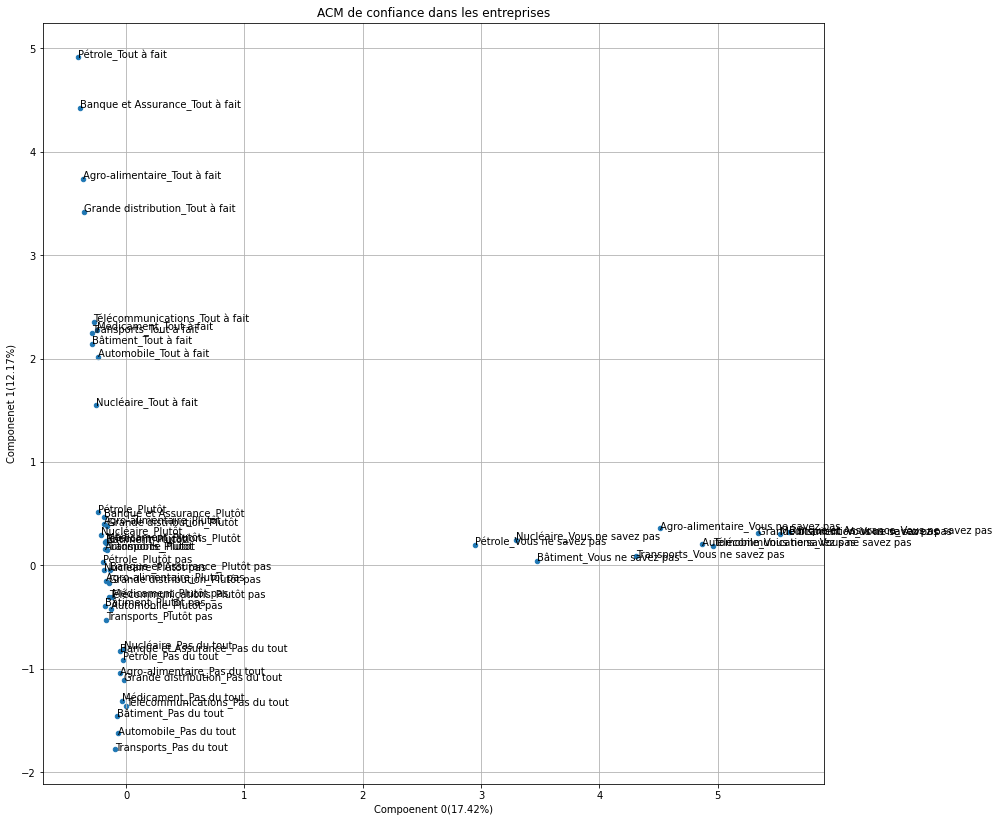

In [241]:
#ACM Items Q86L

#create scatter plot 
plt.rcParams['figure.figsize'] = [14, 14]
x= acm_vQ86L['Compoenent 0(17.42%)']
y= acm_vQ86L['Componenet 1(12.17%)']
ax = acm_vQ86L.plot(kind='scatter', x='Compoenent 0(17.42%)', y='Componenet 1(12.17%)')
plt.grid()

#label each point in scatter plot
annotations = acm_vQ86L['Variable'] 
for i, label in enumerate(annotations):
    plt.text(x[i], y[i],label)

plt.title("ACM de confiance dans les entreprises")    